In [26]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

In [4]:
#Check if GPU is available

print(torch.cuda.is_available())  
print(torch.cuda.current_device())  
print(torch.cuda.get_device_name(0))  

True
0
NVIDIA GeForce GTX 1650


In [7]:
df = pd.read_csv('Dataset A.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Label
0,-0.290000,-0.301323,-0.305000,-0.305000,-0.304415,-0.281769,-0.272354,-0.271421,-0.275390,-0.282939,...,-0.264610,-0.272159,-0.267939,-0.257744,-0.250195,-0.246323,-0.254805,-0.267451,-0.275000,V
1,-0.085000,-0.049763,-0.016574,0.015710,0.050947,0.075710,0.099136,0.127326,0.142758,0.161992,...,-0.593189,-0.591671,-0.609290,-0.617382,-0.620000,-0.620000,-0.617047,-0.613524,-0.610000,F
2,-1.105000,-1.187981,-1.220320,-1.225000,-1.197479,-1.133148,-1.070738,-1.006407,-0.933677,-0.864666,...,-0.807437,-0.843649,-0.871379,-0.884150,-0.865641,-0.837981,-0.812660,-0.798440,-0.780000,S
3,-0.635000,-0.638969,-0.640000,-0.649540,-0.665000,-0.665000,-0.672632,-0.686142,-0.700265,-0.714345,...,-0.931490,-0.941643,-0.948816,-0.945153,-0.949123,-0.953092,-0.963245,-0.977061,-0.985000,N
4,-0.005000,-0.010167,-0.016337,-0.035501,-0.039331,-0.033329,-0.025000,-0.028510,-0.040000,-0.040000,...,-0.543663,-0.541170,-0.520014,-0.523329,-0.520669,-0.533496,-0.544331,-0.535334,-0.535000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36175,-0.079903,-0.062695,-0.061000,-0.060108,-0.061364,-0.050746,-0.042907,-0.031825,-0.031650,-0.028356,...,-0.370832,-0.374337,-0.360132,-0.338431,-0.346395,-0.361059,-0.363464,-0.373066,-0.368029,S
36176,0.030689,0.057104,0.087754,0.096074,0.088168,0.069077,0.036899,0.002406,-0.046811,-0.102094,...,-0.219160,-0.231571,-0.230372,-0.209848,-0.223948,-0.240160,-0.223663,-0.210594,-0.226138,S
36177,0.182875,0.187528,0.183631,0.193358,0.195346,0.197453,0.197457,0.201692,0.199170,0.196049,...,-0.150661,-0.150476,-0.152774,-0.149342,-0.139546,-0.137969,-0.139889,-0.139796,-0.142240,S
36178,-0.019640,-0.024044,-0.000877,0.009950,0.028147,0.035236,0.055796,0.068417,0.081655,0.095830,...,-0.272788,-0.265508,-0.265396,-0.266045,-0.268615,-0.260299,-0.265297,-0.274802,-0.284550,S


In [9]:
X_input = df.iloc[:,:-1]
y_input = df.iloc[:,-1]

In [11]:
# Reshape X to (samples, 360, 1)
X = X_input.values.reshape(X_input.shape[0], X_input.shape[1], 1)

In [13]:
# Encode labels (e.g., N=0, F=1, V=2, S=3, Q=4)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_input)

In [15]:
# Split data into train/validate/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

In [17]:
print("X_train shape:", X_train.shape)  # Should be (samples, 360, 1)
print("y_train shape:", y_train.shape)  # Should be (samples,)
print("X_val shape:", X_val.shape)  
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)  
print("y_test shape:", y_test.shape)

X_train shape: (21708, 360, 1)
y_train shape: (21708,)
X_val shape: (7236, 360, 1)
y_val shape: (7236,)
X_test shape: (7236, 360, 1)
y_test shape: (7236,)


In [19]:
#Module for model training/validation
def model_eval(mdoel, loader, criterion, device):
    mdoel.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = val_loss / len(loader)
    accuracy = 100 * correct/total
    return avg_loss, accuracy

In [21]:
#Module for model tetsing
def model_test(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(loader)
    accuracy = 100 * correct/total
    return avg_loss, accuracy

In [23]:
#RUN HYBRID MODEL
import torch
import torch.nn as nn
import torch.optim as optim

class HybridModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(HybridModel, self).__init__()
        
        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
        )
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size=64, hidden_size=64, num_layers=2, batch_first=True)
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(64, 128),  # Dense layer
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout
            nn.Linear(128, num_classes),  # Output layer
        )
    
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Reshape for CNN (batch_size, features, sequence_length) 
        x = self.cnn(x)  # Output shape: (batch_size, 64, 90)
        x = x.permute(0, 2, 1)  # Reshape to (batch_size, 90, 64) for LSTM
        x, _ = self.lstm(x)  # Output shape: (batch_size, 90, 64)
        x = x[:, -1, :]  # Output shape: (batch_size, 64) to fully connected layer
        x = self.fc(x)  # Output shape: (batch_size, num_classes)
        
        return x

# Hyperparameters
input_size = 1  # Number of input features (1 for ECG signals)
num_classes = len(np.unique(y))  # Number of output classes (e.g., 5 for N/F/V/S/Q)

# Initialize model
model = HybridModel(input_size=input_size, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters())  # Adam optimizer

Epoch [1/20], Train Loss: 1.3744, Train Accuracy: 35.76%,Val Loss: 1.2165, Val Acc: 48.76%
Test Loss: 1.2170, Test Accuracy: 48.83%
Epoch [2/20], Train Loss: 0.8588, Train Accuracy: 67.30%,Val Loss: 0.7173, Val Acc: 72.37%
Test Loss: 0.7331, Test Accuracy: 71.70%
Epoch [3/20], Train Loss: 0.6130, Train Accuracy: 77.64%,Val Loss: 0.4411, Val Acc: 84.87%
Test Loss: 0.4427, Test Accuracy: 84.69%
Epoch [4/20], Train Loss: 0.4068, Train Accuracy: 86.16%,Val Loss: 0.3231, Val Acc: 89.14%
Test Loss: 0.3320, Test Accuracy: 89.01%
Epoch [5/20], Train Loss: 0.3307, Train Accuracy: 89.25%,Val Loss: 0.2743, Val Acc: 90.77%
Test Loss: 0.2676, Test Accuracy: 91.27%
Epoch [6/20], Train Loss: 0.2745, Train Accuracy: 90.87%,Val Loss: 0.2566, Val Acc: 91.53%
Test Loss: 0.2562, Test Accuracy: 91.79%
Epoch [7/20], Train Loss: 0.2466, Train Accuracy: 92.21%,Val Loss: 0.2300, Val Acc: 92.59%
Test Loss: 0.2319, Test Accuracy: 92.51%
Epoch [8/20], Train Loss: 0.2279, Train Accuracy: 93.00%,Val Loss: 0.2108, V

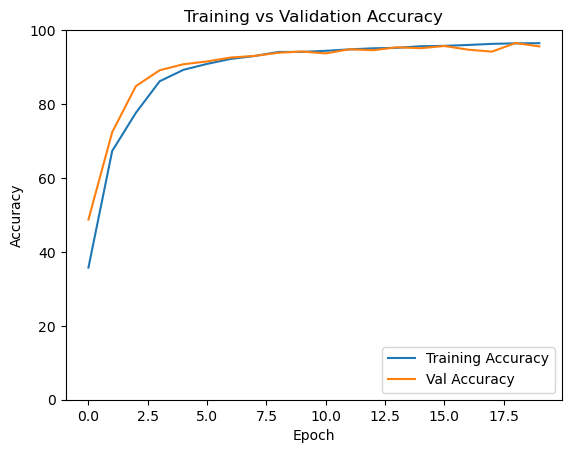

In [25]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [29]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 95.55%


In [31]:
# Get predictions for the test set
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

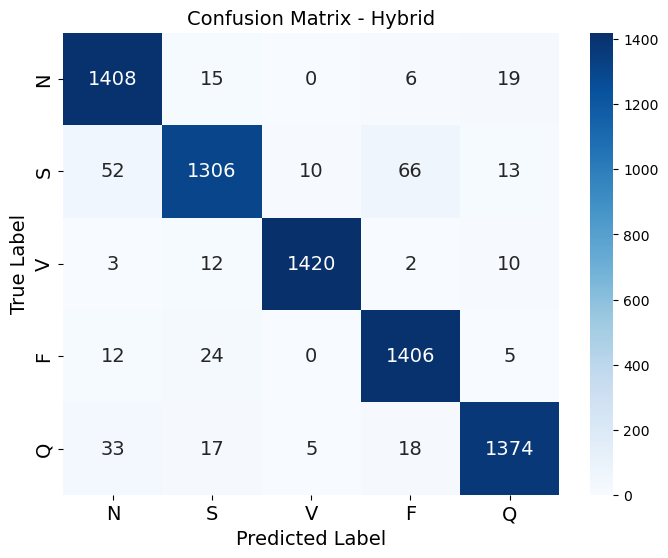

In [32]:
#Display confusion Matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - Hybrid', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [35]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.97      0.95      1448
           S       0.95      0.90      0.93      1447
           V       0.99      0.98      0.99      1447
           F       0.94      0.97      0.95      1447
           Q       0.97      0.95      0.96      1447

    accuracy                           0.96      7236
   macro avg       0.96      0.96      0.96      7236
weighted avg       0.96      0.96      0.96      7236



In [37]:
# Get the classification report as a dictionary
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df = pd.DataFrame(report).transpose()

# Round to 4 decimal places
report_df = report_df.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.9337  0.9724    0.9526  1448.0000
S                0.9505  0.9026    0.9259  1447.0000
V                0.9895  0.9813    0.9854  1447.0000
F                0.9386  0.9717    0.9548  1447.0000
Q                0.9669  0.9496    0.9582  1447.0000
accuracy         0.9555  0.9555    0.9555     0.9555
macro avg        0.9559  0.9555    0.9554  7236.0000
weighted avg     0.9558  0.9555    0.9554  7236.0000


In [39]:
#We save this model to be used for the web application
torch.save(model.state_dict(), "hybrid_model.pth")

In [41]:
#Run CNN Model
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNModel, self).__init__()
        
        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
        )
        self.cnn_output_size = self._calculate_cnn_output_size(360)
                
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(self.cnn_output_size, 128),  # Dense layer
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout
            nn.Linear(128, num_classes),  # Output layer
        )

    def _calculate_cnn_output_size(self, input_sequence_length):
        x = torch.randn(1, 1, input_sequence_length)  # Helper function to calculate the output size of the CNN layers
        x = self.cnn(x)
        return x.view(1, -1).size(1)  # Flatten and get the number of features
    
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Reshape to (batch_size, 1, 360)
        x = self.cnn(x)  # Output shape: (batch_size, 64, 90)
        x = x.view(x.size(0), -1) #Flatten to (batch_size, 64 * 90) to fully connected layer
        x = self.fc(x)  # Output shape: (batch_size, num_classes)
        
        return x

# Hyperparameters
input_size = 1  # Number of input features (1 for ECG signals)
num_classes = len(np.unique(y))  # 5 for N/F/V/S/Q

# Initialize model
model = CNNModel(input_size=input_size, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters())  # Adam optimizer

Epoch [1/20], Train Loss: 0.4858, Train Accuracy: 83.96%,Val Loss: 0.2582, Val Acc: 91.87%
Test Loss: 0.2717, Test Accuracy: 91.71%
Epoch [2/20], Train Loss: 0.2775, Train Accuracy: 91.16%,Val Loss: 0.2080, Val Acc: 93.30%
Test Loss: 0.2083, Test Accuracy: 93.41%
Epoch [3/20], Train Loss: 0.2238, Train Accuracy: 92.89%,Val Loss: 0.1676, Val Acc: 94.93%
Test Loss: 0.1666, Test Accuracy: 95.01%
Epoch [4/20], Train Loss: 0.1876, Train Accuracy: 93.94%,Val Loss: 0.1661, Val Acc: 94.94%
Test Loss: 0.1616, Test Accuracy: 94.90%
Epoch [5/20], Train Loss: 0.1673, Train Accuracy: 94.60%,Val Loss: 0.1432, Val Acc: 95.33%
Test Loss: 0.1389, Test Accuracy: 95.56%
Epoch [6/20], Train Loss: 0.1477, Train Accuracy: 95.22%,Val Loss: 0.1567, Val Acc: 95.40%
Test Loss: 0.1520, Test Accuracy: 95.54%
Epoch [7/20], Train Loss: 0.1329, Train Accuracy: 95.76%,Val Loss: 0.1585, Val Acc: 95.40%
Test Loss: 0.1537, Test Accuracy: 95.30%
Epoch [8/20], Train Loss: 0.1288, Train Accuracy: 95.76%,Val Loss: 0.1231, V

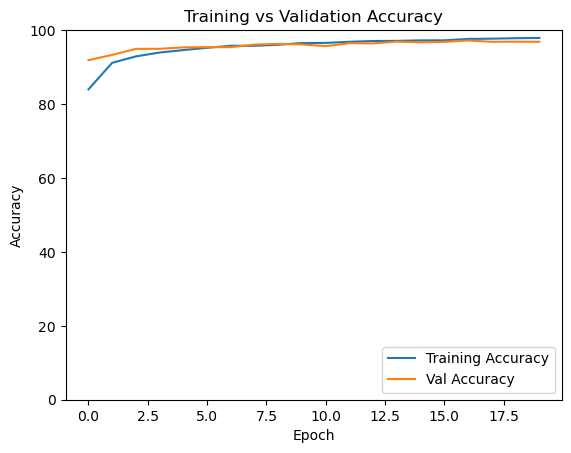

In [43]:
# Convert data to PyTorch tensors
X_train_tensor_2 = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor_2 = torch.tensor(y_train, dtype=torch.long)
X_val_tensor_2 = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor_2 = torch.tensor(y_val, dtype=torch.long)
X_test_tensor_2 = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor_2 = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor_2, y_train_tensor_2)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor_2, y_val_tensor_2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor_2, y_test_tensor_2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses_2 = []
train_accuracies_2 = []
val_losses_2 = []
val_accuracies_2 = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses_2.append(train_loss)
    train_accuracies_2.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses_2.append(val_loss)
    val_accuracies_2.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy
plt.plot(train_accuracies_2, label='Training Accuracy')
plt.plot(val_accuracies_2, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [45]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 97.51%


In [46]:
# Get predictions for the test set
y_true_2 = []
y_pred_2 = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true_2.extend(labels.cpu().numpy())
        y_pred_2.extend(predicted.cpu().numpy())

y_true_2 = np.array(y_true_2)
y_pred_2 = np.array(y_pred_2)

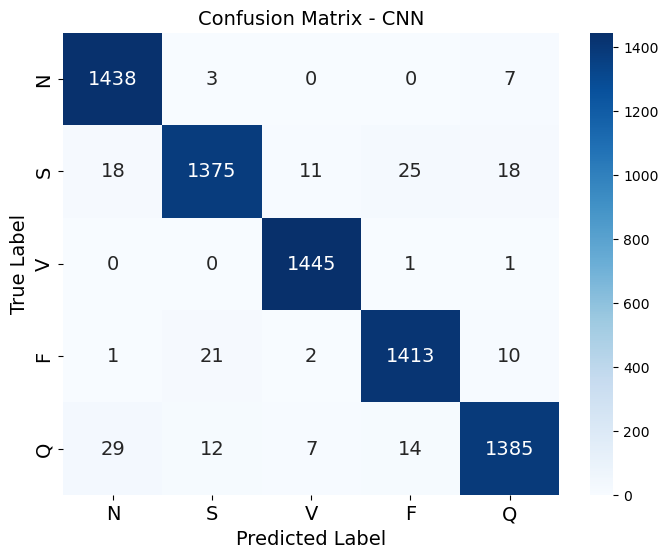

In [48]:
#Display confusion matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_2, y_pred_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - CNN', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [51]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_2, y_pred_2, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.97      0.99      0.98      1448
           S       0.97      0.95      0.96      1447
           V       0.99      1.00      0.99      1447
           F       0.97      0.98      0.97      1447
           Q       0.97      0.96      0.97      1447

    accuracy                           0.98      7236
   macro avg       0.98      0.98      0.98      7236
weighted avg       0.98      0.98      0.98      7236



In [53]:
# Get the classification report as a dictionary
report_2 = classification_report(y_true_2, y_pred_2, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df_2 = pd.DataFrame(report_2).transpose()

# Round to 4 decimal places
report_df_2 = report_df_2.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df_2)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.9677  0.9931    0.9802  1448.0000
S                0.9745  0.9502    0.9622  1447.0000
V                0.9863  0.9986    0.9924  1447.0000
F                0.9725  0.9765    0.9745  1447.0000
Q                0.9747  0.9572    0.9658  1447.0000
accuracy         0.9751  0.9751    0.9751     0.9751
macro avg        0.9751  0.9751    0.9750  7236.0000
weighted avg     0.9751  0.9751    0.9750  7236.0000


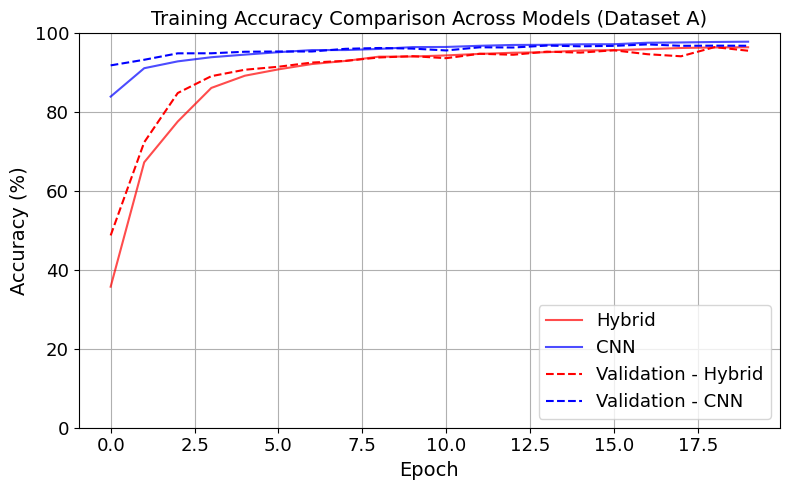

In [55]:
#Compare both models
plt.figure(figsize=(8, 5))

# Plot training accuracy for all three models
plt.plot(train_accuracies, label='Hybrid', color='red', alpha = 0.7)
plt.plot(train_accuracies_2, label='CNN', color = 'blue', alpha = 0.7)
#plt.plot(train_accuracies_3, label='LSTM', color = 'green')
plt.plot(val_accuracies, label='Validation - Hybrid', color='red', linestyle = 'dashed')
plt.plot(val_accuracies_2, label='Validation - CNN', color = 'blue', linestyle = 'dashed')

# Add labels and styling
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy (%)', fontsize = 14)
plt.ylim([0, 100])
plt.title('Training Accuracy Comparison Across Models (Dataset A)', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', fontsize = 13)
plt.grid(True)
plt.tight_layout()
plt.show()

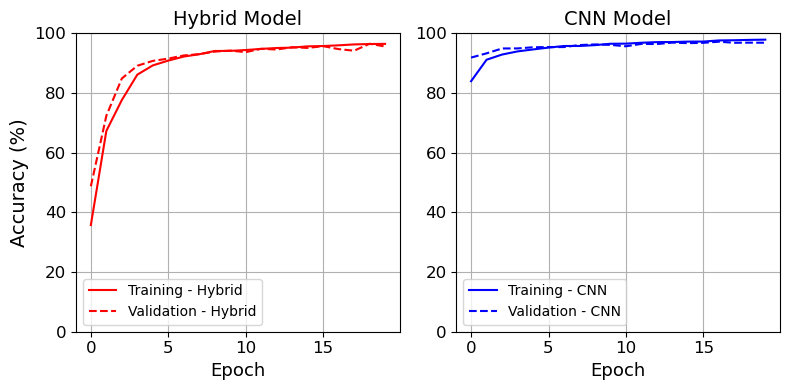

In [57]:
fig, axs = plt.subplots(1,2,figsize=(8,4),sharex=True)
#For Hybrid
axs[0].plot(train_accuracies, label='Training - Hybrid',color='red')
axs[0].plot(val_accuracies, label='Validation - Hybrid',color='red', linestyle='dashed')
axs[0].set_title('Hybrid Model', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=13)
axs[0].set_ylabel('Accuracy (%)', fontsize=14)
axs[0].set_ylim([0, 100])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].legend()
axs[0].grid(True)

#For CNN
axs[1].plot(train_accuracies_2, label='Training - CNN',color='blue')
axs[1].plot(val_accuracies_2, label='Validation - CNN',color='blue', linestyle='dashed')
axs[1].set_title('CNN Model', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=13)
#axs[1].set_ylabel('Accuracy (%)', fontsize=12)
axs[1].set_ylim([0, 100])
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()